In [1]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

import csv

# Create an empty 2D NumPy array with shape (122, 121)
data = np.empty((122, 121), dtype=np.int32)

# Open the CSV file and read the data into the array
with open('output_bin.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for i, row in enumerate(reader):
        data[i] = np.array(row, dtype=np.int32)

# Extract the desired sub-matrix with shape (121, 121)
X = data[:121, :121]

m, n = X.shape
print(f" m = {m}, n= {n}")
print ('The shape of X is: ' + str(X.shape))
print ('The first element of X is: \n', X[0])

# Print the matrix to verify it was read correctly
print(X)


 m = 121, n= 121
The shape of X is: (121, 121)
The first element of X is: 
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
[[1 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 1]]


In [2]:
data = np.empty((121,), dtype=np.int32)

# Open the CSV file and read the data into the array
with open('labels_bin.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for i, row in enumerate(reader):
        data[i] = int(row[0])

# Reshape the 1D array into a column vector with shape (121, 1)
Y = data.reshape((121, 1))


m, n = Y.shape
print(f" m = {m}, n= {n}")
print ('The shape of X is: ' + str(Y.shape))
print ('The first element of Y is: \n', Y[0])

# Print the matrix to verify it was read correctly
print(Y)

 m = 121, n= 1
The shape of X is: (121, 1)
The first element of Y is: 
 [0]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


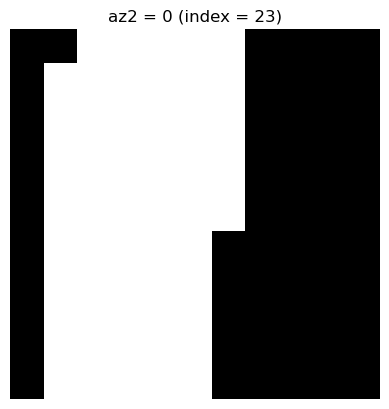

In [3]:
m, n = X.shape

index = np.random.randint(m)  
Q = X[index].reshape((11,11)).T
plt.imshow(Q, cmap='gray')
plt.title(Y[index,0])
plt.title(f"az2 = {Y[index,0]} (index = {index})")
plt.axis('off')
plt.show()

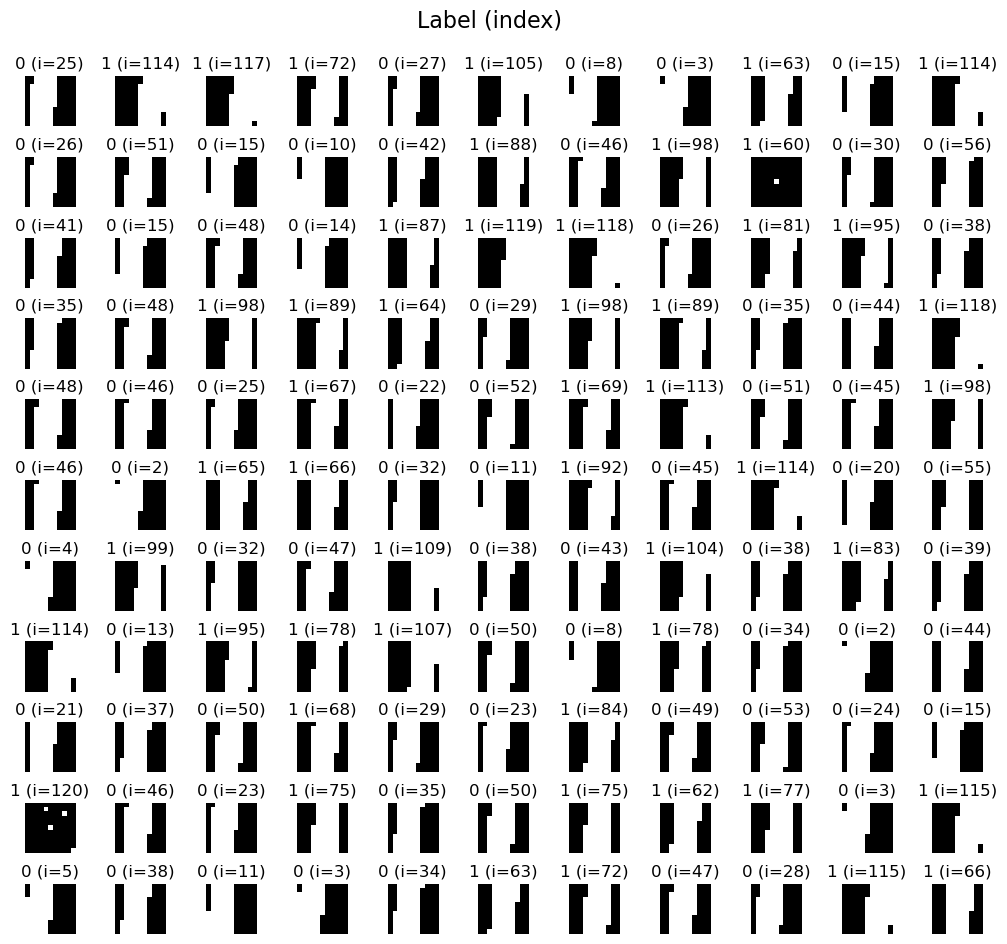

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(11,11, figsize=(10,10))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    Q = X[index].reshape((11,11)).T
    
    # Display the image
    ax.imshow(Q, cmap='gray')
    
    # Display the label above the image
    ax.set_title(f"{Y[index,0]} (i={index})")
    ax.set_axis_off()
    fig.suptitle("Label (index)", fontsize=16)

In [55]:
model = Sequential(
    [               
        tf.keras.Input(shape=(121,)),    #specify input size
        ### START CODE HERE ### 
        tf.keras.layers.Dense(7, activation="sigmoid"),
        tf.keras.layers.Dense(1, activation="sigmoid")
        ### END CODE HERE ### 
    ], name = "my_model" 
)       

In [56]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 7)                 854       
                                                                 
 dense_9 (Dense)             (None, 1)                 8         
                                                                 
Total params: 862
Trainable params: 862
Non-trainable params: 0
_________________________________________________________________


In [45]:
L1_num_params = 121 * 7 + 8  # W1 parameters  + b1 parameters
L2_num_params = 8 * 1 + 1     # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params)

L1 params =  976 , L2 params =  9


In [46]:
[layer1, layer2] = model.layers

In [47]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")

W1 shape = (121, 8), b1 shape = (8,)
W2 shape = (8, 1), b2 shape = (1,)


In [48]:
print(model.layers[1].weights)

[<tf.Variable 'dense_7/kernel:0' shape=(8, 1) dtype=float32, numpy=
array([[-0.3073408 ],
       [ 0.5329131 ],
       [ 0.30201483],
       [-0.8055407 ],
       [ 0.46947765],
       [-0.17856598],
       [-0.3386329 ],
       [ 0.80370903]], dtype=float32)>, <tf.Variable 'dense_7/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [49]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

In [50]:

model.fit(
    X,Y,
    epochs=300
)

Epoch 1/300


2023-03-05 23:39:11.985880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 46ms/step - loss: 0.5850
Epoch 2/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5492
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5144
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 0.4852
Epoch 5/300
4/4 [==============================] - 0s 7ms/step - loss: 0.4574
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4327
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4107
Epoch 8/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3905
Epoch 9/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3731
Epoch 10/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3571
Epoch 11/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3431
Epoch 12/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3302
Epoch 13/300
4/4 [==============================] - 0s 6ms/step - loss: 

4/4 [==============================] - 0s 7ms/step - loss: 0.0917
Epoch 105/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0908
Epoch 106/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0900
Epoch 107/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0892
Epoch 108/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0885
Epoch 109/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0877
Epoch 110/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0870
Epoch 111/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0864
Epoch 112/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0855
Epoch 113/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0848
Epoch 114/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0841
Epoch 115/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0834
Epoch 116/300
4/4 [==============================] - 0

4/4 [==============================] - 0s 6ms/step - loss: 0.0438
Epoch 207/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0436
Epoch 208/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0433
Epoch 209/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0430
Epoch 210/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0428
Epoch 211/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0426
Epoch 212/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0423
Epoch 213/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0421
Epoch 214/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0418
Epoch 215/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0415
Epoch 216/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0413
Epoch 217/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0410
Epoch 218/300
4/4 [==============================] - 0

In [51]:
prediction = model.predict(X[0].reshape(1,121))  # a zero
print(f"predicting a zero: {prediction}")

if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0

print(f"prediction after threshold: {yhat}")


1/1 [==============================] - 0s 38ms/step
predicting a zero: [[0.18574548]]
prediction after threshold: 0


2023-03-05 23:39:24.985523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 8ms/step


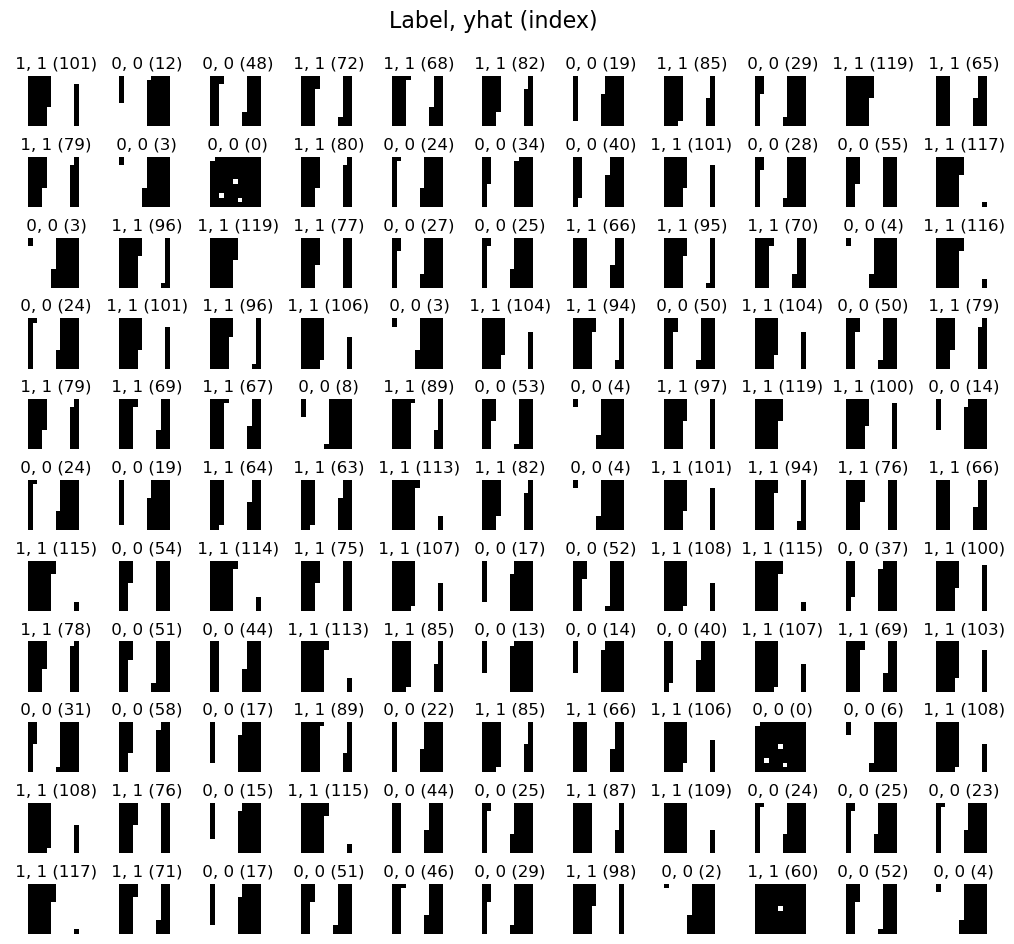

In [52]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(11,11, figsize=(10,10))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]


for i,ax in enumerate(axes.flat):
    # Select random indices
    index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    Q = X[index].reshape((11,11)).T
    
    # Display the image
    ax.imshow(Q, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[index].reshape(1,121))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f" {Y[index,0]}, {yhat} ({index})")
    ax.set_axis_off()
fig.suptitle("Label, yhat (index)", fontsize=16)
plt.show()

In [53]:
prediction = model.predict(X[0].reshape(1,121))  # a zero
print(f"predicting a zero: {prediction}")

if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0

print(f"prediction after threshold: {yhat}")


1/1 [==============================] - 0s 9ms/step
predicting a zero: [[0.18574548]]
prediction after threshold: 0


In [54]:
print(model.layers[1].weights)

[<tf.Variable 'dense_7/kernel:0' shape=(8, 1) dtype=float32, numpy=
array([[-0.93054986],
       [ 1.1976055 ],
       [ 1.005104  ],
       [-1.4638953 ],
       [ 1.1876523 ],
       [-0.8208874 ],
       [-0.97884387],
       [ 1.3831031 ]], dtype=float32)>, <tf.Variable 'dense_7/bias:0' shape=(1,) dtype=float32, numpy=array([-0.13500099], dtype=float32)>]
